## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("darkgrid")
%matplotlib inline

## Data Exploration

In [2]:
house_df = pd.read_csv("bekasi-house-new.csv")
house_df.head()

,bedroom,bathroom,land_area,building_area,carport,prop_type,certificate,electric_power,maid_bedroom,floor_num,year_built,prop_cond,furniture_cond,ad_id,facing,garage,maid_bathroom,price
0,3.0,3.0,77,112,2.0,House,SHM - Sertifikat Hak Milik,2200.0,1.0,2.0,2021.0,Good,Semi Furnished,hos14357221,NaN,0.0,0.0,1.350
1,3.0,3.0,73,93,0.0,House,SHM - Sertifikat Hak Milik,2200.0,0.0,2.0,2023.0,New,Unfurnished,hos13901815,East,0.0,0.0,0.995
2,2.0,2.0,105,90,1.0,House,SHM - Sertifikat Hak Milik,2200.0,0.0,2.0,NaN,Renovated,Unfurnished,hos14186873,South,2.0,0.0,1.020
3,3.0,2.0,210,150,0.0,House,SHM - Sertifikat Hak Milik,2200.0,1.0,1.0,NaN,Good,Unfurnished,hos14314243,NaN,0.0,1.0,1.500
4,2.0,2.0,60,50,1.0,House,SHM - Sertifikat Hak Milik,2200.0,0.0,2.0,NaN,Good,Unfurnished,hos13940617,North,0.0,0.0,1.100


#### Check missing values

In [3]:
house_df.isnull().sum()

bedroom             0
bathroom            0
land_area           0
building_area       0
carport             0
prop_type           0
certificate         3
electric_power     54
maid_bedroom        0
floor_num           0
year_built        533
prop_cond          46
furniture_cond    183
ad_id               0
facing            587
garage              0
maid_bathroom       0
price               0
dtype: int64

#### Check data types

In [4]:
house_df.dtypes

bedroom           float64
bathroom          float64
land_area           int64
building_area       int64
carport           float64
prop_type          object
certificate        object
electric_power    float64
maid_bedroom      float64
floor_num         float64
year_built        float64
prop_cond          object
furniture_cond     object
ad_id              object
facing             object
garage            float64
maid_bathroom     float64
price             float64
dtype: object

In [5]:
house_df.describe()

,bedroom,bathroom,land_area,building_area,carport,electric_power,maid_bedroom,floor_num,year_built,garage,maid_bathroom,price
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,958.000000,1012.000000,1012.000000,479.000000,1012.000000,1012.000000,1012.000000
mean,2.925889,2.067194,122.594862,118.142292,0.984190,2408.820459,0.259881,1.523715,2013.446764,0.346838,0.155138,1.419577
std,1.472948,1.226734,124.939993,141.773560,0.905935,1889.078761,0.493931,0.581984,72.020633,0.671049,0.370317,1.865791
min,0.000000,0.000000,36.000000,22.000000,0.000000,450.000000,0.000000,0.000000,1111.000000,0.000000,0.000000,0.028000
25%,2.000000,1.000000,72.000000,54.000000,0.000000,1300.000000,0.000000,1.000000,2019.000000,0.000000,0.000000,0.657500
50%,3.000000,2.000000,90.000000,82.500000,1.000000,2200.000000,0.000000,2.000000,2022.000000,0.000000,0.000000,0.980000
75%,3.000000,3.000000,136.000000,130.000000,1.000000,2200.000000,0.000000,2.000000,2023.000000,1.000000,0.000000,1.500000
max,18.000000,16.000000,2060.000000,2000.000000,10.000000,33000.000000,4.000000,5.000000,2023.000000,7.000000,3.000000,40.000000


## Data Preprocessing

First, we want to do data preprocessing by apply feature engineering to some features.

In [6]:
# Available bedrooms and bathrooms are combined
house_df['bedroom'] = house_df['bedroom'] + house_df['maid_bedroom']
house_df['bathroom'] = house_df['bathroom'] + house_df['maid_bathroom']

house_df.drop(['maid_bedroom', 'maid_bathroom'], axis=1, inplace=True)

In [7]:
# Compare land area and building area of all houses
house_df[["land_area", "building_area"]].sample(10)

,land_area,building_area
405,72,50
470,78,54
408,90,60
655,90,130
580,84,56
499,110,100
886,80,97
497,72,36
111,175,120
620,72,55


Look at the dataframe above, there are houses whose land area is bigger than building area, also reversely.

In [8]:
# Combine Carport and Garage
house_df['car_garage'] = house_df['carport'] + house_df['garage']

house_df.drop(['carport', 'garage'], axis=1, inplace=True)

In [9]:
# Electric Power: Obtain data which has no missing value in electric_power column
cleaned_df = house_df[house_df['electric_power'].notna()]

print(f"Missing values on electric_power (house_df): {house_df['electric_power'].isnull().sum()}")
print(f"Missing values on electric_power (cleaned_df): {cleaned_df['electric_power'].isnull().sum()}")

Missing values on electric_power (house_df): 54
Missing values on electric_power (cleaned_df): 0


Probably, we can do simple imputation to the electric_power column. Let's check the distribution of electric_power

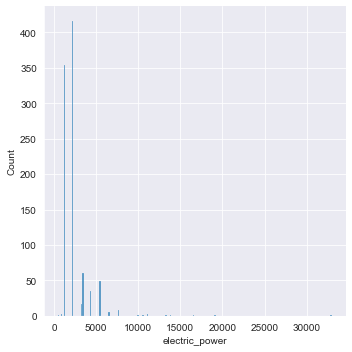

In [10]:
sns.displot(cleaned_df['electric_power'])

In [11]:
cleaned_df[cleaned_df['electric_power'] > 30000]

,bedroom,bathroom,land_area,building_area,prop_type,certificate,electric_power,floor_num,year_built,prop_cond,furniture_cond,ad_id,facing,price,car_garage
335,9.0,6.0,561,2000,House,SHM - Sertifikat Hak Milik,33000.0,5.0,2005.0,Good,Furnished,hos14154604,NaN,40.0,5.0


For me, this house has spectacular price. So, we want to check the distribution of houses' price.

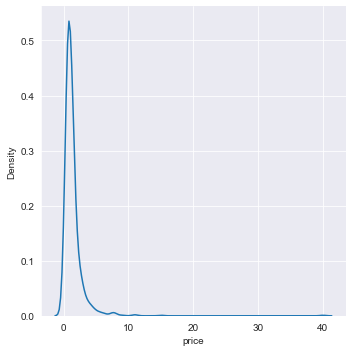

In [12]:
sns.displot(cleaned_df['price'], kind='kde')

In [13]:
cleaned_df[cleaned_df['price'] > 3].shape

(65, 15)

There are **65 houses** getting price of **more than 3 billions rupiah**

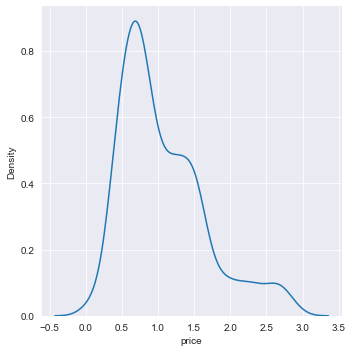

In [14]:
sns.displot(cleaned_df[cleaned_df['price'] < 3]['price'], kind='kde')

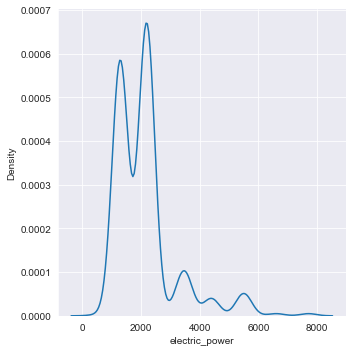

In [15]:
sns.displot(cleaned_df[cleaned_df['price'] < 3]['electric_power'], kind='kde')

From the distribution plot of houses' price, we can assume **prices** are **distributed normally**. So does **electric_power**, roughly.

In [16]:
# Therefore, we only take houses whose price is less than 3 billions rupiah
cleaned_df = cleaned_df[cleaned_df['price'] < 3]

cleaned_df.shape

(889, 15)

#### Handle Missing Values

In [17]:
# Show all missing values
is_null = cleaned_df.isnull().sum()
is_null = is_null[is_null > 0].copy()
is_null

certificate         3
year_built        446
prop_cond          36
furniture_cond    153
facing            495
dtype: int64

##### Categorical Features

In [18]:
null_cat_cols = [col for col in is_null.index if col != "year_built"]
null_cat_cols

['certificate', 'prop_cond', 'furniture_cond', 'facing']

In [19]:
math.ceil(len(null_cat_cols) / 2)

2

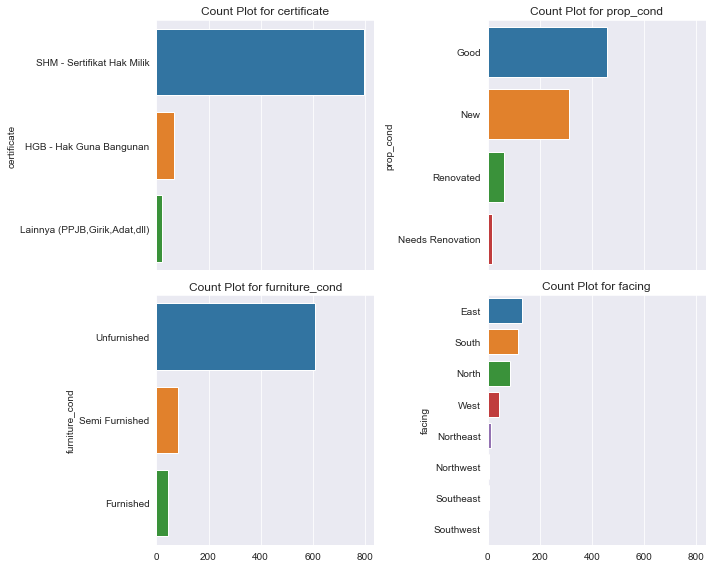

In [20]:
# Look at the visualization of count plot
fig, axs = plt.subplots(math.ceil(len(null_cat_cols) / 2), 2, sharex=True, figsize=(10, 8))

count = 0
for i in range(math.ceil(len(null_cat_cols) / 2)):
    for j in range(2):
        col = null_cat_cols[count]
        sns.countplot(y=cleaned_df[col], ax=axs[i][j], order=cleaned_df[col].value_counts().index)
        axs[i][j].set_title(f"Count Plot for {col}")
        axs[i][j].set(xlabel=None)
        count += 1
    
fig.tight_layout()
plt.show()

In [21]:
cleaned_df['certificate'].mode().values

array(['SHM - Sertifikat Hak Milik'], dtype=object)

In [22]:
# Simple Imputation: Mode (for each feature above)
cleaned_df['certificate'] = cleaned_df['certificate'].fillna("SHM - Sertifikat Hak Milik")
cleaned_df['prop_cond'] = cleaned_df['prop_cond'].fillna("Good")
cleaned_df['furniture_cond'] = cleaned_df['furniture_cond'].fillna("Unfurnished")
cleaned_df['facing'] = cleaned_df['facing'].fillna("East")

##### Numerical Features

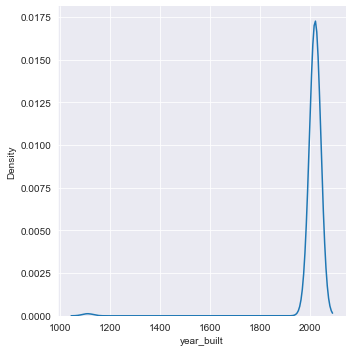

In [23]:
# Year built
sns.displot(cleaned_df['year_built'], kind='kde')

In [24]:
# Let's check if there is any house whose year built is in year less than 1900
cleaned_df[cleaned_df['year_built'] < 1900]

,bedroom,bathroom,land_area,building_area,prop_type,certificate,electric_power,floor_num,year_built,prop_cond,furniture_cond,ad_id,facing,price,car_garage
641,5.0,5.0,227,227,House,SHM - Sertifikat Hak Milik,4400.0,2.0,1111.0,Renovated,Semi Furnished,hos14355391,East,2.35,1.0
998,1.0,1.0,220,120,House,SHM - Sertifikat Hak Milik,3500.0,2.0,1111.0,Renovated,Semi Furnished,hos14241568,West,2.00,0.0
999,3.0,2.0,81,120,House,SHM - Sertifikat Hak Milik,2200.0,2.0,1111.0,Good,Semi Furnished,hos14241498,East,1.25,1.0


I think removing these rows will not do any harm. So, let's do that!

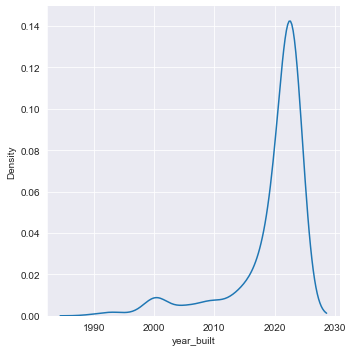

In [25]:
# Remove any rows whose index is in (641, 998, 999)
cleaned_df.drop([641, 998, 999], inplace=True)

# Let's see the real distribution plot once again
sns.displot(cleaned_df['year_built'], kind='kde')

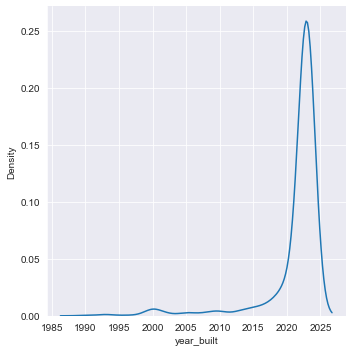

In [26]:
# Since the distribution plot show a sign of there is left skewness, then we want to impute the NaN values by **MEDIAN**
cleaned_df['year_built'] = cleaned_df['year_built'].fillna(round(cleaned_df['year_built'].median()))

# Let's see the real distribution plot once again
sns.displot(cleaned_df['year_built'], kind='kde')

In [27]:
cleaned_df.isnull().sum()

bedroom           0
bathroom          0
land_area         0
building_area     0
prop_type         0
certificate       0
electric_power    0
floor_num         0
year_built        0
prop_cond         0
furniture_cond    0
ad_id             0
facing            0
price             0
car_garage        0
dtype: int64

### Feature Engineering

Missing values are clearly handled. Up to next stage, we want to do more deeply on some **feature engineering** techniques. Then, we will **define numerical and categotical columns** in the end.
<br><br>
Let's do that.

In [28]:
from datetime import datetime

# This analysis was made on 2023
now_year = datetime.now().year

In [29]:
# Drop unrelevant columns for model building: prop_type, ad_id
cleaned_df.drop(["prop_type", "ad_id"], axis=1, inplace=True)

# feature engineering: year_built -> house_age
cleaned_df['house_age'] = now_year - cleaned_df['year_built']
cleaned_df.drop("year_built", axis=1, inplace=True)

In [30]:
cleaned_df.head()

,bedroom,bathroom,land_area,building_area,certificate,electric_power,floor_num,prop_cond,furniture_cond,facing,price,car_garage,house_age
0,4.0,3.0,77,112,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Semi Furnished,East,1.350,2.0,2.0
1,3.0,3.0,73,93,SHM - Sertifikat Hak Milik,2200.0,2.0,New,Unfurnished,East,0.995,0.0,0.0
2,2.0,2.0,105,90,SHM - Sertifikat Hak Milik,2200.0,2.0,Renovated,Unfurnished,South,1.020,3.0,0.0
3,4.0,3.0,210,150,SHM - Sertifikat Hak Milik,2200.0,1.0,Good,Unfurnished,East,1.500,0.0,0.0
4,2.0,2.0,60,50,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Unfurnished,North,1.100,1.0,0.0


In [31]:
# Define numerical and categorical columns
num_cols = list(cleaned_df.dtypes[cleaned_df.dtypes != 'O'].index)
cat_cols = list(cleaned_df.dtypes[cleaned_df.dtypes == 'O'].index)

print(f"Numerical columns: {', '.join(num_cols)}")
print(f"Categorical columns: {', '.join(cat_cols)}")

Numerical columns: bedroom, bathroom, land_area, building_area, electric_power, floor_num, price, car_garage, house_age
Categorical columns: certificate, prop_cond, furniture_cond, facing


Ideally, we want to **encode categorical features** and **standarization**, so all the features can be inputted into our model. Since this step is data analysis, we will do that later in **model building step**. 
<br><br>
Let's see all the characteristics of our current house data.

## Data Exploration (2)

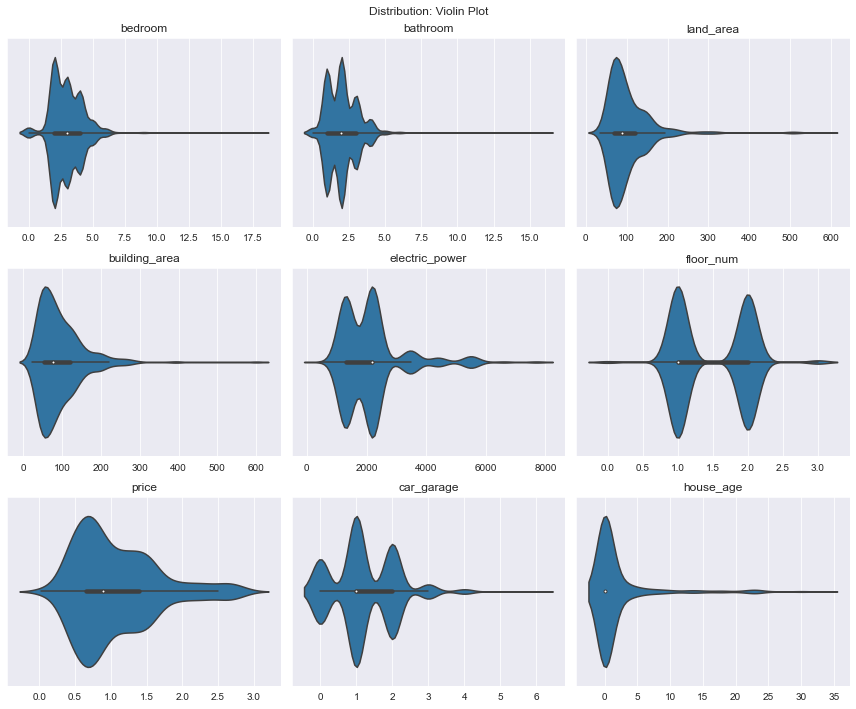

In [32]:
# Distribution plot (numerical features)
fig, axs = plt.subplots(math.ceil(len(num_cols) / 3), 3, figsize=(12, 10))

plt.suptitle("Distribution: Violin Plot")
count = 0
for i in range(math.ceil(len(num_cols) / 3)):
    for j in range(3):
        col = num_cols[count]
        sns.violinplot(x=cleaned_df[col], ax=axs[i][j])
        axs[i][j].set_title(col)
        axs[i][j].set(xlabel=None)
        count += 1
    
fig.tight_layout()
plt.show()

There are many outliers for most of numerical features. So, we want to **check the 1st and 99th percentile** of one of numerical columns, **except price** (target data), then **look at the distribution plot** again after changes.

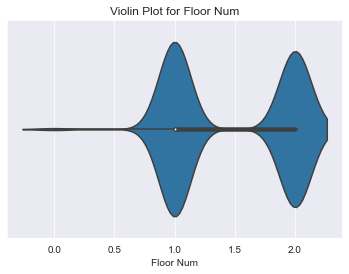

In [33]:
import random

# Choose one column by random
except_target = [col for col in num_cols if col != "price"]
chosen_col = random.choice(except_target)

# Look at the distribution of chosen feature whose value is less than its 99th percentile
percentile_99 = cleaned_df[chosen_col].quantile(0.99)
sns.violinplot(x=cleaned_df[cleaned_df[chosen_col] < percentile_99][chosen_col])

col_name = " ".join(chosen_col.split("_")).title()
plt.title(f"Violin Plot for {col_name}")
plt.xlabel(col_name)
plt.show()

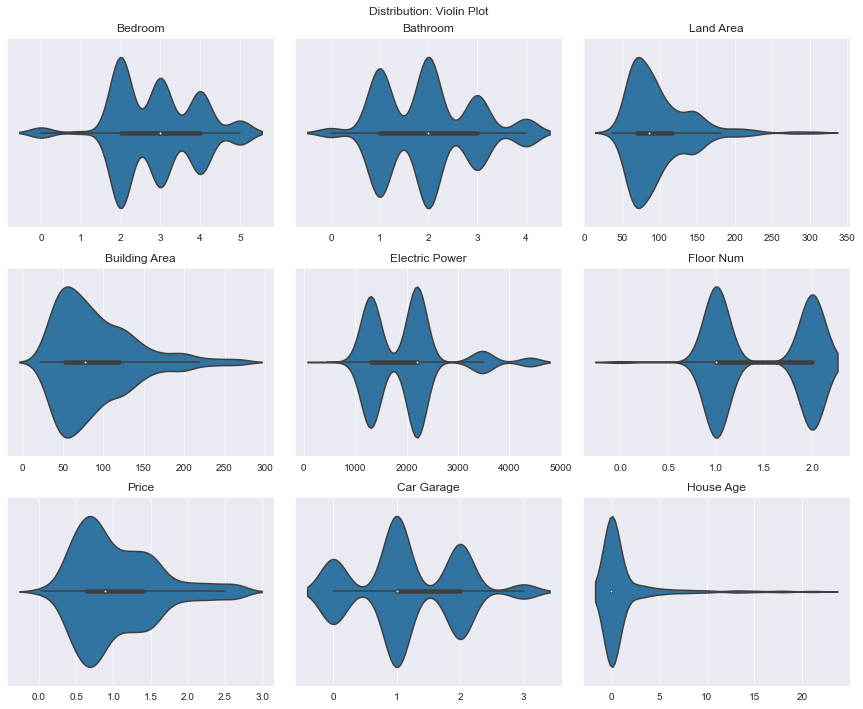

In [34]:
# ONCE AGAIN !! Distribution plot (numerical features)
fig, axs = plt.subplots(math.ceil(len(num_cols) / 3), 3, figsize=(12, 10))

plt.suptitle("Distribution: Violin Plot")
count = 0
for i in range(math.ceil(len(num_cols) / 3)):
    for j in range(3):
        
        # Visualization Plot
        chosen_col = num_cols[count]
        percentile_99 = cleaned_df[chosen_col].quantile(0.99)
        sns.violinplot(x=cleaned_df[cleaned_df[chosen_col] < percentile_99][chosen_col], ax=axs[i][j])

        # Configure additional elements for plotting
        col_name = " ".join(chosen_col.split("_")).title()
        axs[i][j].set_title(col_name)
        axs[i][j].set(xlabel=None)
        count += 1
    
fig.tight_layout()
plt.show()

From the distribution plot above, we can consider <b>all columns, <u>except land area, building area, price, and house age</u></b> to be **ordinal**-based categorical columns.

In [35]:
# Let's remove outlier whose land area is highter than 98th quantile
percentile_98 = cleaned_df["land_area"].quantile(0.98)
cleaned_df = cleaned_df[cleaned_df['land_area'] < percentile_98]

cleaned_df.shape

(868, 13)

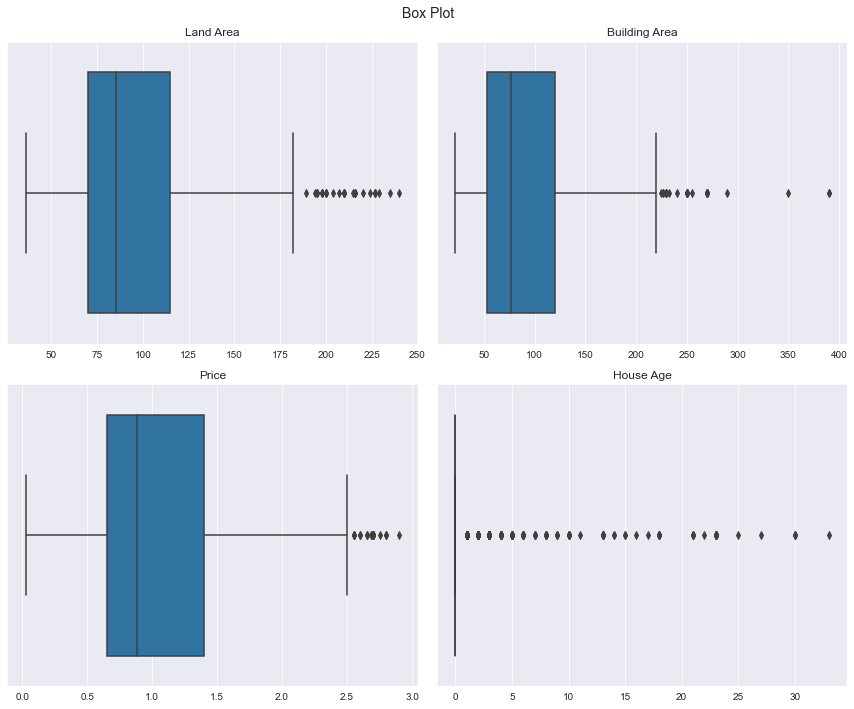

In [36]:
# Next, we are only interested in land area, building area, price and house age column
# Since, all columns except four of them are considered to be categorical
columns_interest = ["land_area", "building_area", "price", "house_age"]

fig, axs = plt.subplots(math.ceil(len(columns_interest) / 2), 2, figsize=(12, 10))

plt.suptitle("Box Plot", fontsize=14)
count = 0
for i in range(math.ceil(len(columns_interest) / 2)):
    for j in range(2):
        
        # Visualization Plot
        chosen_col = columns_interest[count]
        sns.boxplot(x=cleaned_df[chosen_col], ax=axs[i][j])

        # Configure additional elements for plotting
        col_name = " ".join(chosen_col.split("_")).title()
        axs[i][j].set_title(col_name)
        axs[i][j].set(xlabel=None)
        count += 1
    
fig.tight_layout()
plt.show()

In [37]:
# There is anomaly in house_age as you can see there are so many outliers. We want drop that column
cleaned_df.drop("house_age", axis=1, inplace=True)

# Also, we want our price to be distributed normally
q3_price = cleaned_df['price'].quantile(0.75)
q1_price = cleaned_df['price'].quantile(0.25)
iqr_price = q3_price - q1_price
price_threshold = q3_price + 1.5 * iqr_price

cleaned_df = cleaned_df[cleaned_df['price'] < price_threshold]
cleaned_df.shape

(843, 12)

In [38]:
# Also, we want our price to be distributed normally by removing outliers (IQR)
q3_price = cleaned_df['price'].quantile(0.75)
q1_price = cleaned_df['price'].quantile(0.25)
iqr_price = q3_price - q1_price
price_threshold = q3_price + 1.5 * iqr_price

cleaned_df = cleaned_df[cleaned_df['price'] < price_threshold]
cleaned_df.shape

(823, 12)

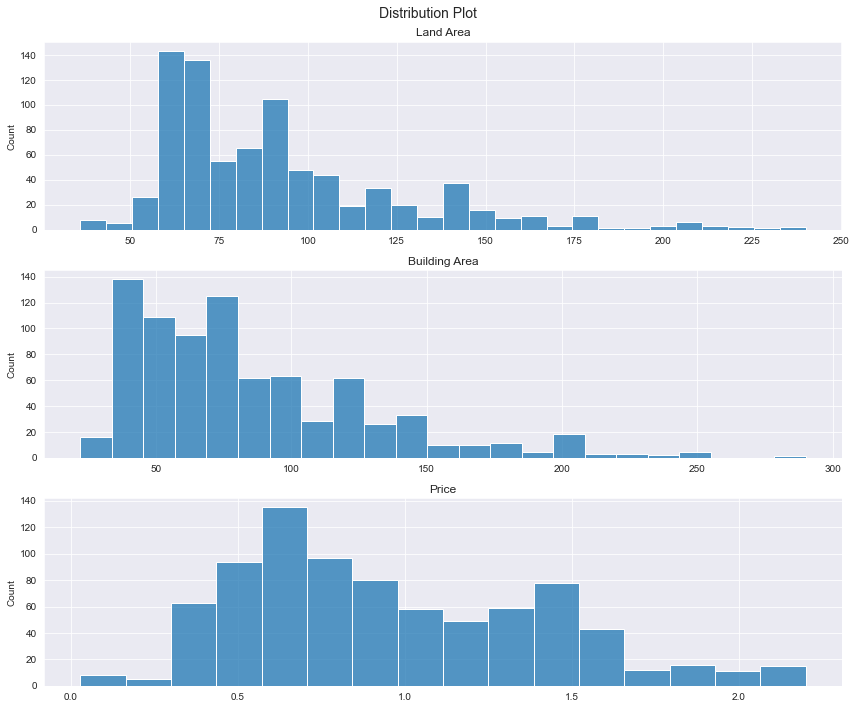

In [39]:
# We do it again, because the price is still not distributed normally
columns_interest = ["land_area", "building_area", "price"]

fig, axs = plt.subplots(math.ceil(len(columns_interest)), figsize=(12, 10))

plt.suptitle("Distribution Plot", fontsize=14)
count = 0
for i in range(math.ceil(len(columns_interest))):
        
    # Visualization Plot
    chosen_col = columns_interest[count]
    sns.histplot(cleaned_df[chosen_col], ax=axs[i])

    # Configure additional elements for plotting
    col_name = " ".join(chosen_col.split("_")).title()
    axs[i].set_title(col_name)
    axs[i].set(xlabel=None)
    count += 1
    
fig.tight_layout()
plt.show()

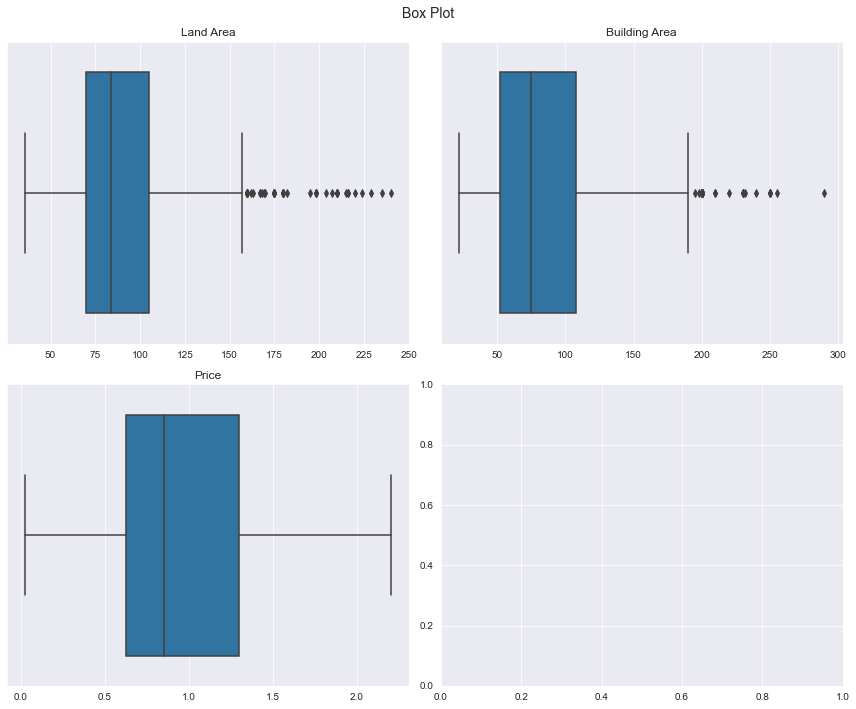

In [40]:
# Next, we are only interested in land area, building area, price and house age column
# Since, all columns except four of them are considered to be categorical
columns_interest = ["land_area", "building_area", "price"]

fig, axs = plt.subplots(math.ceil(len(columns_interest) / 2), 2, figsize=(12, 10))

plt.suptitle("Box Plot", fontsize=14)
count = 0
for i in range(math.ceil(len(columns_interest) / 2)):
    for j in range(2):
        
        try:
            # Visualization Plot
            chosen_col = columns_interest[count]
            sns.boxplot(x=cleaned_df[chosen_col], ax=axs[i][j])

            # Configure additional elements for plotting
            col_name = " ".join(chosen_col.split("_")).title()
            axs[i][j].set_title(col_name)
            axs[i][j].set(xlabel=None)
            count += 1
        except IndexError:
            pass
    
fig.tight_layout()
plt.show()

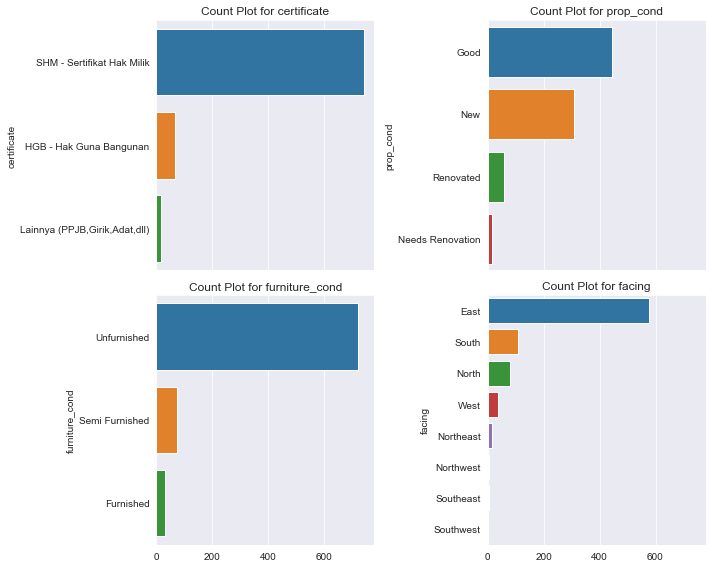

In [41]:
# Categorical Features Plot
fig, axs = plt.subplots(math.ceil(len(cat_cols) / 2), 2, sharex=True, figsize=(10, 8))

count = 0
for i in range(math.ceil(len(cat_cols) / 2)):
    for j in range(2):
        col = null_cat_cols[count]
        sns.countplot(y=cleaned_df[col], ax=axs[i][j], order=cleaned_df[col].value_counts().index)
        axs[i][j].set_title(f"Count Plot for {col}")
        axs[i][j].set(xlabel=None)
        count += 1
    
fig.tight_layout()
plt.show()

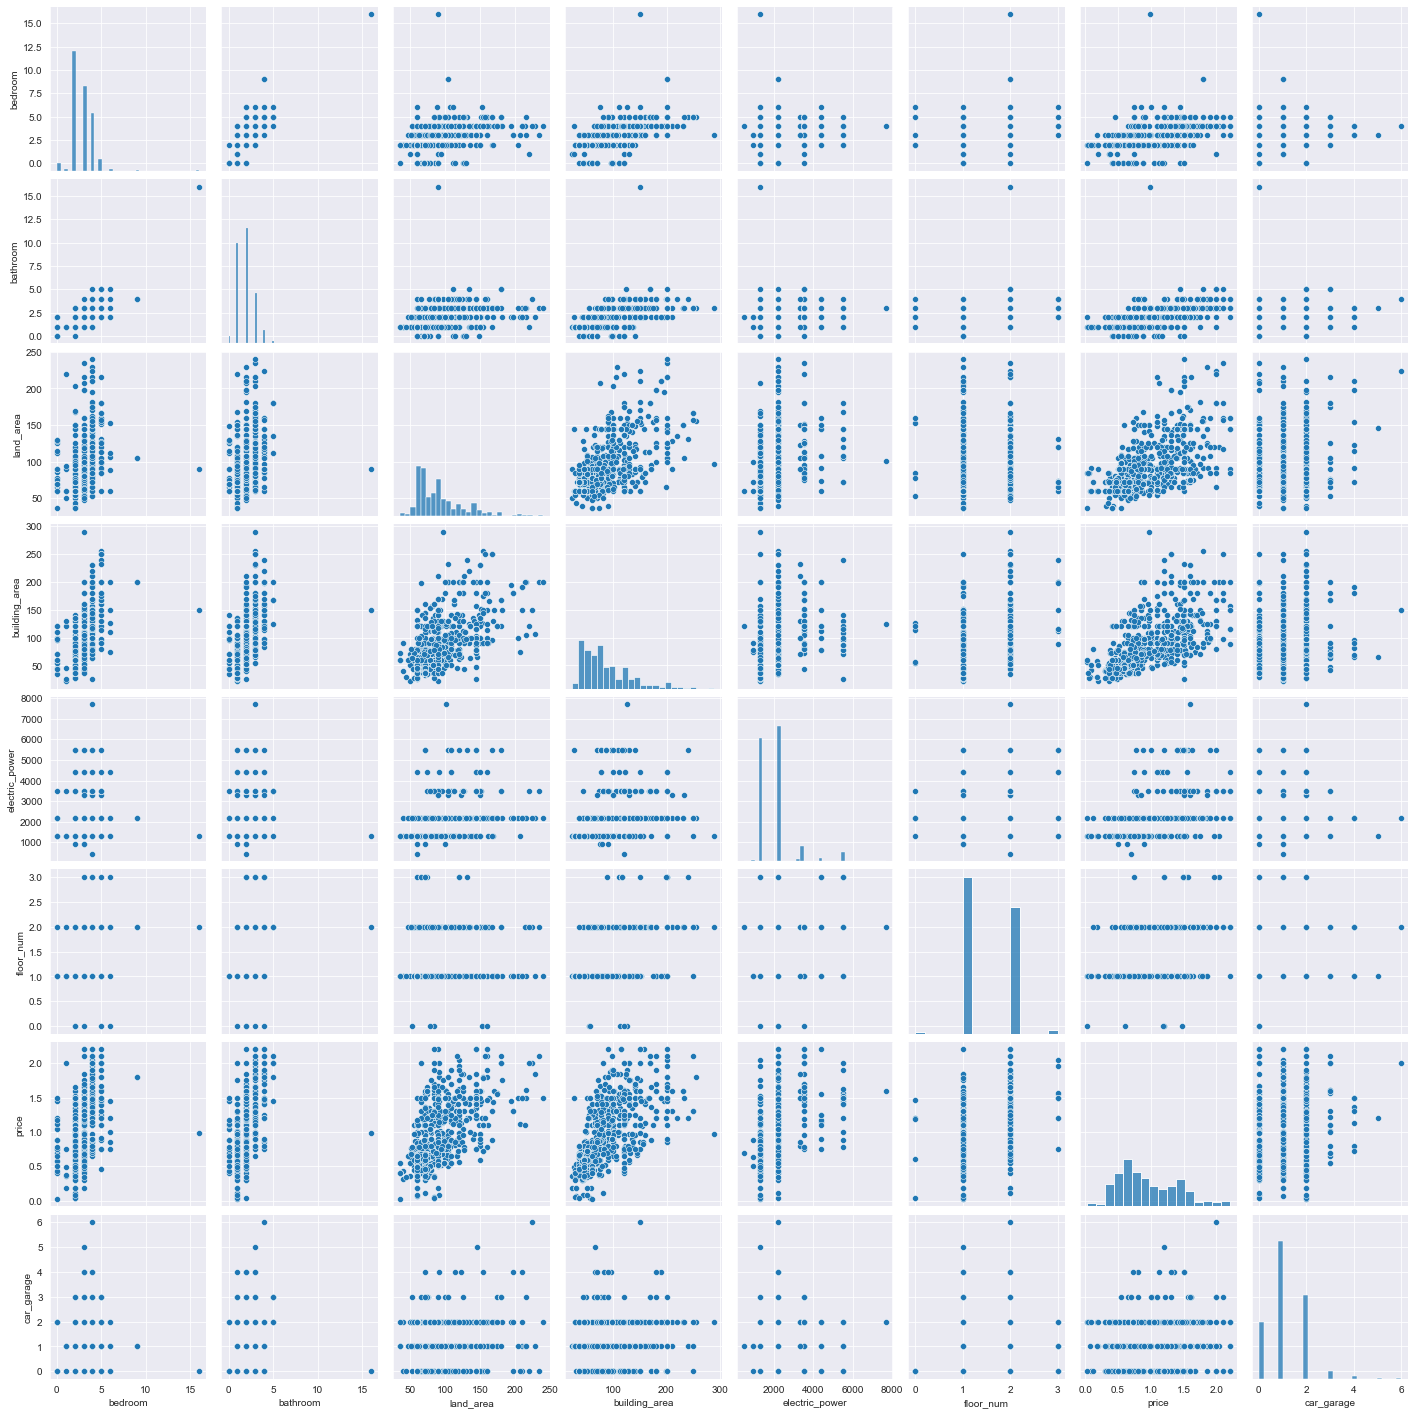

In [42]:
sns.pairplot(cleaned_df)

All of the features are **positively correlated** with price column. Then, building area seems to be highly correlated with land area. For further analysis, let's look at correlation map.

#### Further Analysis on Categorical Features

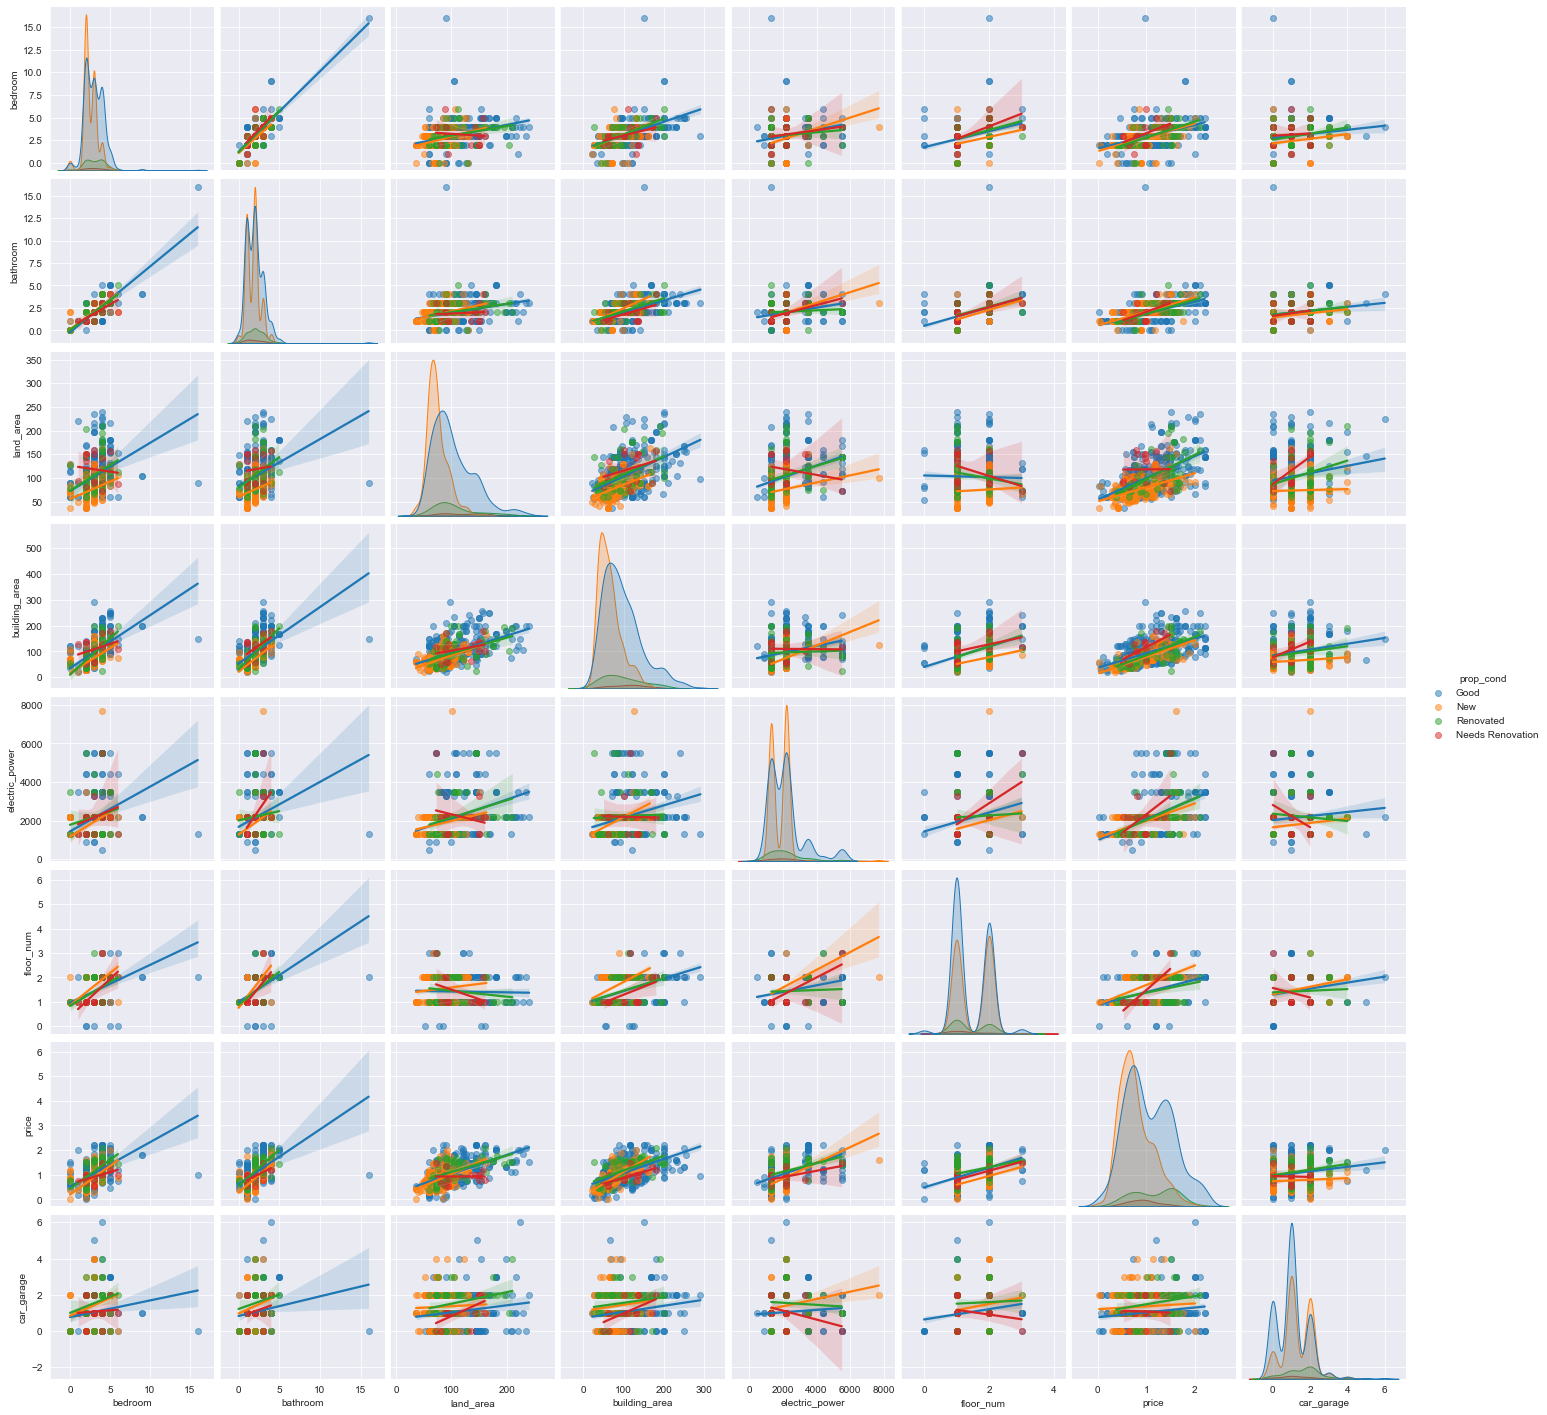

In [43]:
# Based on prop_cond
sns.pairplot(cleaned_df, kind='reg', hue="prop_cond", plot_kws={"scatter_kws": {'alpha': 0.5}})

It seems that **new** houses have more standout in **electric_power**. As you can see **new houses have their electric_power correlated highly with any features**. Therefore, **prop_cond can give the impact of the price prediction's performance**.

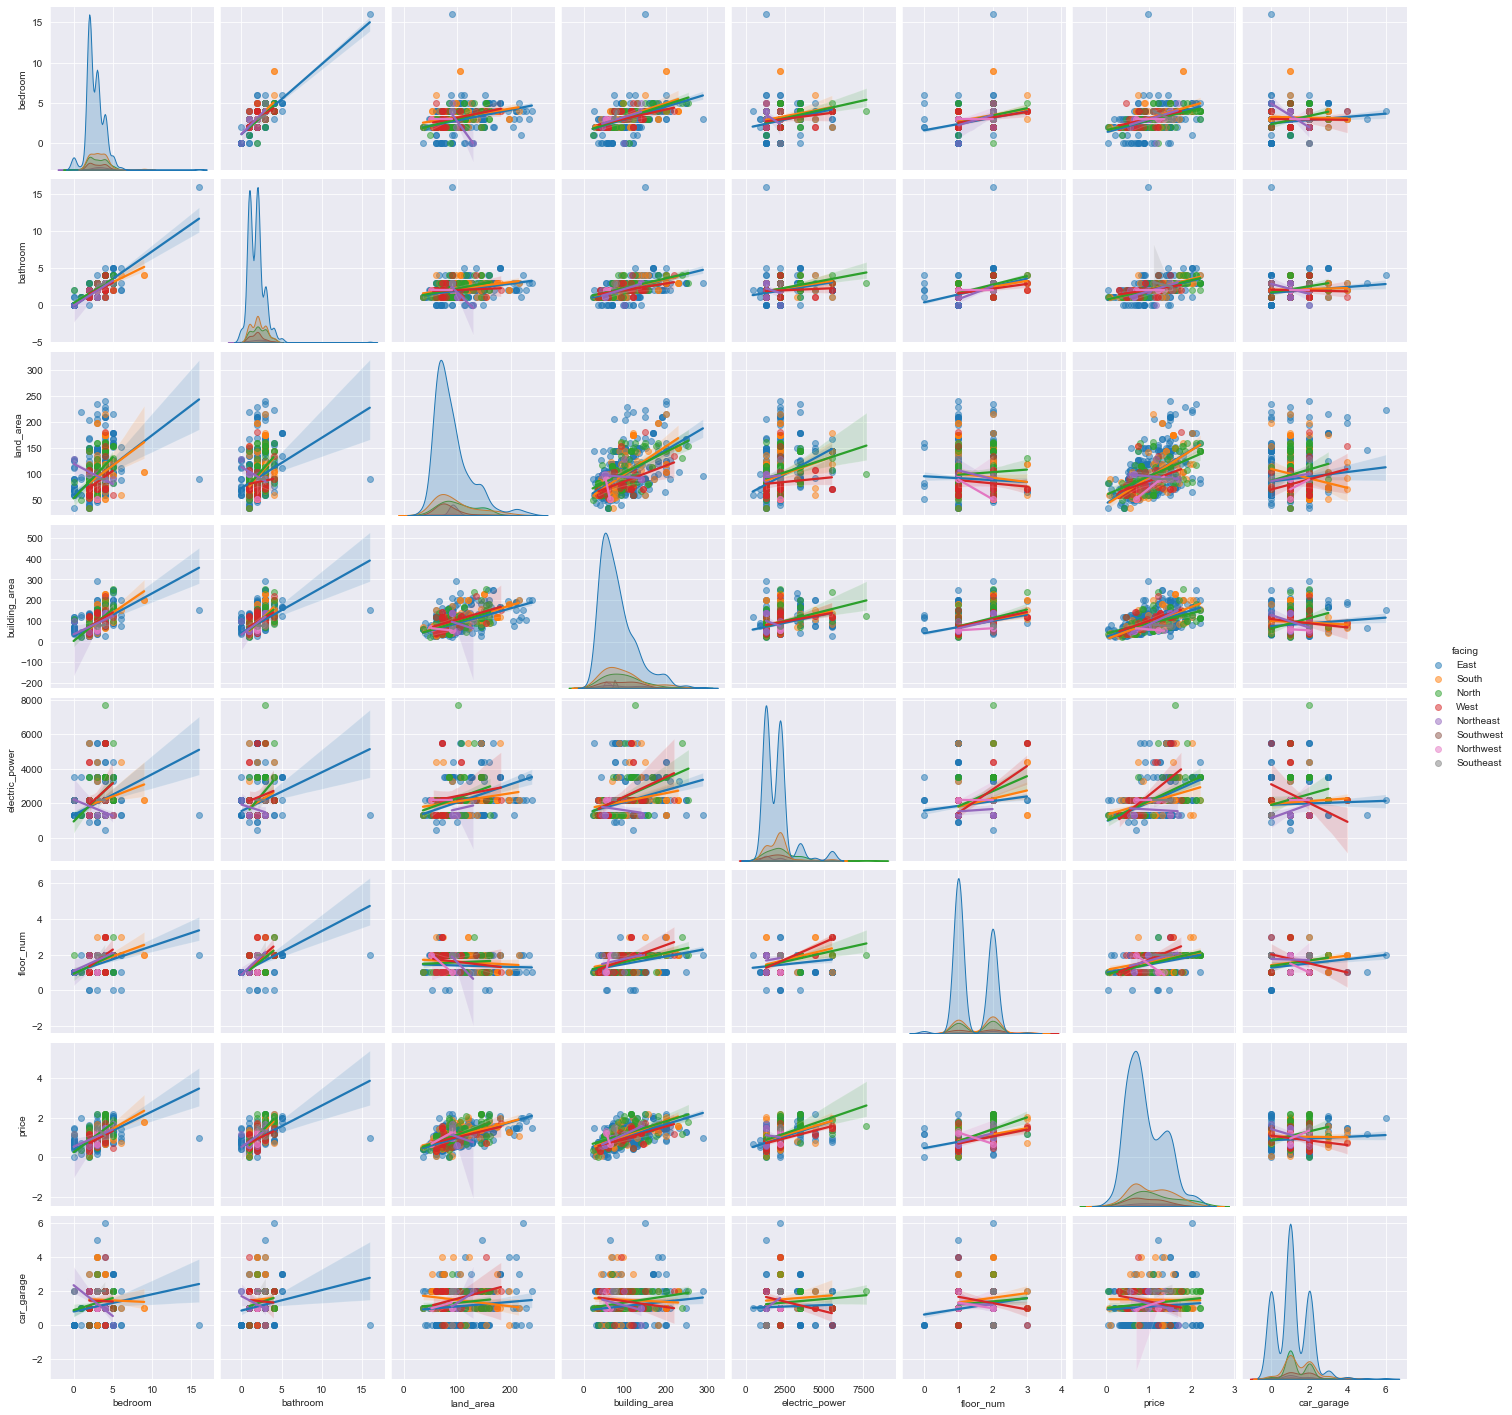

In [44]:
# Based on facing
sns.pairplot(cleaned_df, kind='reg', hue="facing", plot_kws={"scatter_kws": {'alpha': 0.5}})

There is nothing special insight for **facing** column. It is also the same if you check for **certificate** and **furniture_cond**.

#### Correlation Map

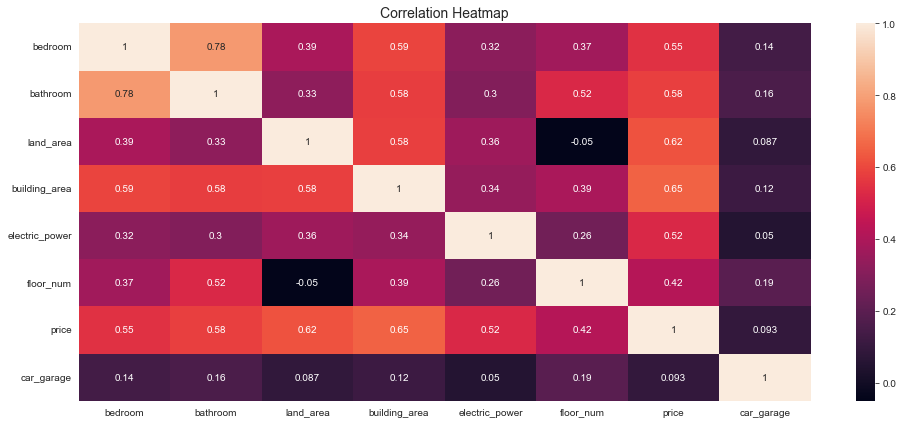

In [45]:
plt.figure(figsize=(14, 6))
sns.heatmap(cleaned_df.corr(), annot=True)

plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

Each feature is positively correlated with another, specificly feature **"car_garage" is not affected by multicollinearity problem**. However, **the feature has the lowest correlation with price**. So, we will drop the column.

In [46]:
# Drop any features whose has lowest correlation with price
cleaned_df.drop("car_garage", axis=1, inplace=True)

For now, analysis on house data is done. Next, we will build a machine learning model. 
<br><br>
1. First of all, we want to **check all the statistic assumptions** for machine learning algorithm building. 
2. Then, we probably want to **label encoding** for categorical features and/or **standardization**.
3. Don't forget to **compare any built models** with cross validation and set up right metrics.
4. **Hyperparameter Tuning !!**
5. **Save our best model**.

## Final Checkpoint

In [47]:
cleaned_df.head()

,bedroom,bathroom,land_area,building_area,certificate,electric_power,floor_num,prop_cond,furniture_cond,facing,price
0,4.0,3.0,77,112,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Semi Furnished,East,1.350
1,3.0,3.0,73,93,SHM - Sertifikat Hak Milik,2200.0,2.0,New,Unfurnished,East,0.995
2,2.0,2.0,105,90,SHM - Sertifikat Hak Milik,2200.0,2.0,Renovated,Unfurnished,South,1.020
3,4.0,3.0,210,150,SHM - Sertifikat Hak Milik,2200.0,1.0,Good,Unfurnished,East,1.500
4,2.0,2.0,60,50,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Unfurnished,North,1.100


In [48]:
cleaned_df.shape

(823, 11)

In [49]:
# Save our preprocessed data
cleaned_df.to_csv("bekasi-house-preprocessed.csv", index=False)